https://www.kaggle.com/datasets/milanvaddoriya/zomato-reviews-ratings

In [1]:
import pandas as pd
df = pd.read_csv('/content/zomato_reviews.csv')

In [2]:
df.head(10)

,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...
5,5,5,shandar zabardast zindabad .. good going bawar...
6,6,5,overall good experience . will order again
7,7,1,good but cold of food
8,8,5,tasty food . homestyle tasty prepration.
9,9,5,loved it . 5/5 .


In [3]:
print(df.isnull().sum())

Unnamed: 0    0
rating        0
review        1
dtype: int64


In [4]:
df.dropna(inplace=True)

In [5]:
print(df.isnull().sum())

Unnamed: 0    0
rating        0
review        0
dtype: int64


In [6]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Remove extra whitespaces
    text = ' '.join(text.split())
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# Apply preprocess_text function to 'review' column
df['clean_review'] = df['review'].apply(preprocess_text)

# Display the preprocessed data
print(df[['review', 'clean_review']].head(10))

                                              review  \
0                                               nice   
1  best biryani , so supportive staff of outlet ,...   
2     delivery boy was very decent and supportive.👌👍   
3  worst biryani i have tasted in my life, half o...   
4  all food is good and tasty . will order again ...   
5  shandar zabardast zindabad .. good going bawar...   
6         overall good experience . will order again   
7                              good but cold of food   
8          tasty food . homestyle tasty prepration.    
9                                  loved it . 5/5 .    

                                        clean_review  
0                                               nice  
1  best biryani supportive staff outlet personali...  
2                     delivery boy decent supportive  
3     worst biryani tasted life half biryani dustbin  
4  food good tasty order lots explore bawarchis menu  
5  shandar zabardast zindabad good going bawarchi... 

In [8]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [12]:
sentiment_scores = []
for text in df['clean_review']:
  score = sid.polarity_scores(text)
  sentiment_scores.append(score['compound'])

df['Sentiment Score'] = sentiment_scores

In [13]:
def get_sentiment_label(score):
  if score >= 0.05:
    return "Positive"
  elif score <= 0.05:
    return "Negative"
  else:
    return "Neutral"

sentiment_labels = df['Sentiment Score'].apply(get_sentiment_label)

df['Sentiment Label'] = sentiment_labels

In [14]:
df.head(10)

,Unnamed: 0,rating,review,clean_review,Sentiment Score,Sentiment Label
0,0,5,nice,nice,0.4215,Positive
1,1,5,"best biryani , so supportive staff of outlet ,...",best biryani supportive staff outlet personali...,0.7506,Positive
2,2,4,delivery boy was very decent and supportive.👌👍,delivery boy decent supportive,0.2960,Positive
3,3,1,"worst biryani i have tasted in my life, half o...",worst biryani tasted life half biryani dustbin,-0.6249,Negative
4,4,5,all food is good and tasty . will order again ...,food good tasty order lots explore bawarchis menu,0.4404,Positive
5,5,5,shandar zabardast zindabad .. good going bawar...,shandar zabardast zindabad good going bawarchi...,0.4404,Positive
6,6,5,overall good experience . will order again,overall good experience order,0.4404,Positive
7,7,1,good but cold of food,good cold food,0.4404,Positive
8,8,5,tasty food . homestyle tasty prepration.,tasty food homestyle tasty prepration,0.0000,Negative
9,9,5,loved it . 5/5 .,loved,0.5994,Positive


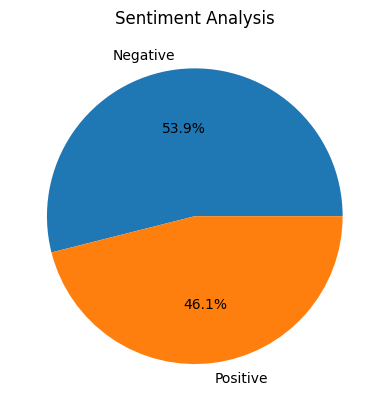

In [15]:
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment Label'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index,autopct="%1.1f%%")
plt.title('Sentiment Analysis')
plt.show()

In [ ]:
!pip install textblob

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from textblob import TextBlob

# Sample text for sentiment analysis
text = "I hate this product!"

# Perform sentiment analysis
blob = TextBlob(text)
sentiment_score = blob.sentiment.polarity

# Interpret sentiment score
if sentiment_score > 0:
    sentiment = "Positive"
elif sentiment_score == 0:
    sentiment = "Neutral"
else:
    sentiment = "Negative"

print("Sentiment:", sentiment)
print("Sentiment Score:", sentiment_score)


Sentiment: Negative
Sentiment Score: -1.0


Topic Modelling

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming you have loaded your Zomato review dataset into a DataFrame named 'zomato_data'
# If not, replace 'your_zomato_dataset.csv' with your actual dataset file
# zomato_data = pd.read_csv('zomato_reviews.csv')
zomato_data = df

# Fill missing values in 'Reviews' column with empty strings
zomato_data['clean_review'].fillna('', inplace=True)

# Combine ratings and reviews into a single text column
zomato_data['Text'] = zomato_data['rating'].astype(str) + ' ' + zomato_data['clean_review']

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(zomato_data['Text'])

# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Display the top words for each topic
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        sorted_indices = topic.argsort()[::-1][:n_top_words]
        for i in sorted_indices:
            word_prob = feature_names[i]
            prob = topic[i] / topic.sum()  # Normalizing probability
            print(f"{prob:.4f} * {word_prob}", end=', ')
        print()

# Display the top words and their probabilities for each topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, n_top_words)


Topic 1:
0.0280 * like, 0.0250 * got, 0.0217 * didnt, 0.0217 * awesome, 0.0176 * time, 0.0176 * place, 0.0166 * ordered, 0.0136 * amazing, 0.0129 * cream, 0.0129 * onion, 
Topic 2:
0.1959 * good, 0.0506 * nice, 0.0438 * food, 0.0431 * quantity, 0.0425 * taste, 0.0294 * test, 0.0225 * quality, 0.0185 * fresh, 0.0142 * price, 0.0124 * cake, 
Topic 3:
0.0699 * food, 0.0470 * bad, 0.0325 * taste, 0.0241 * money, 0.0203 * cold, 0.0197 * horrible, 0.0185 * tasty, 0.0174 * quality, 0.0158 * waste, 0.0152 * spicy, 
Topic 4:
0.0497 * delivery, 0.0438 * taste, 0.0433 * best, 0.0412 * service, 0.0326 * pizza, 0.0240 * quality, 0.0228 * cheese, 0.0221 * time, 0.0221 * food, 0.0200 * great, 
Topic 5:
0.0692 * order, 0.0243 * worst, 0.0216 * food, 0.0170 * packing, 0.0169 * biryani, 0.0159 * taste, 0.0159 * bad, 0.0147 * sandwich, 0.0146 * dont, 0.0132 * like, 


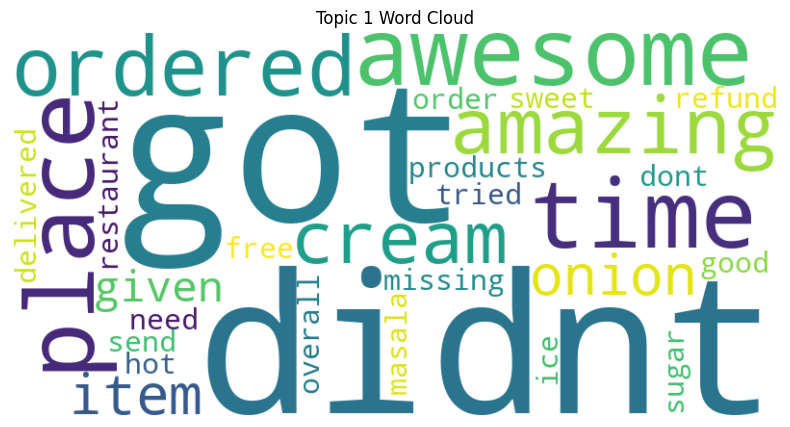

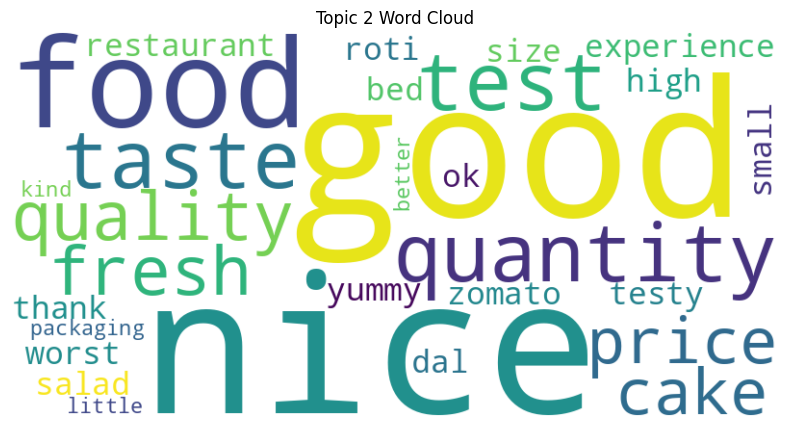

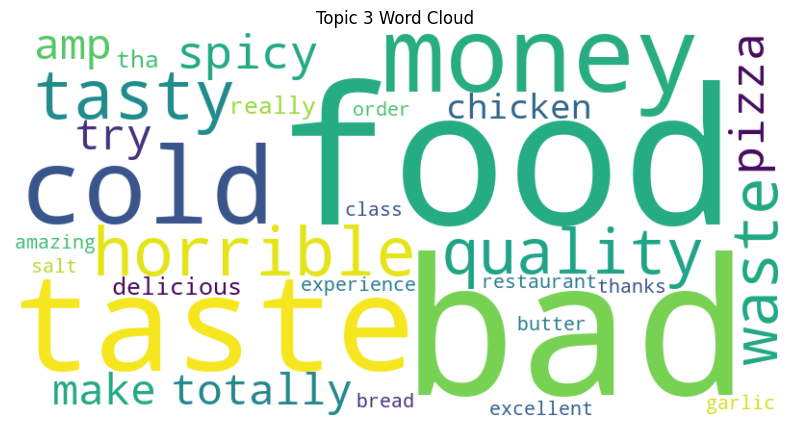

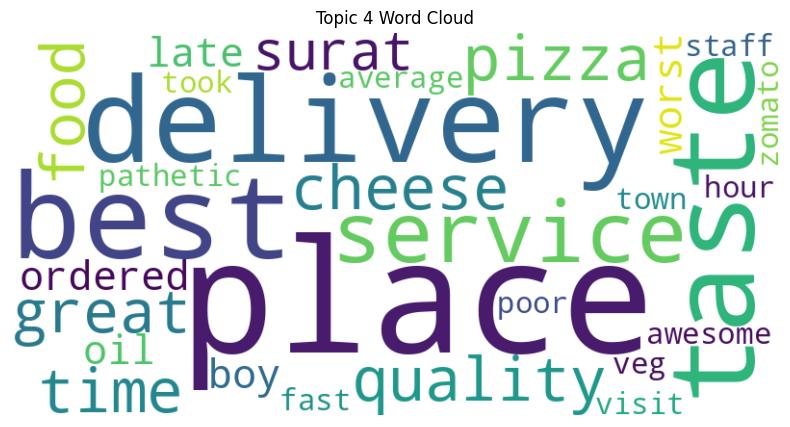

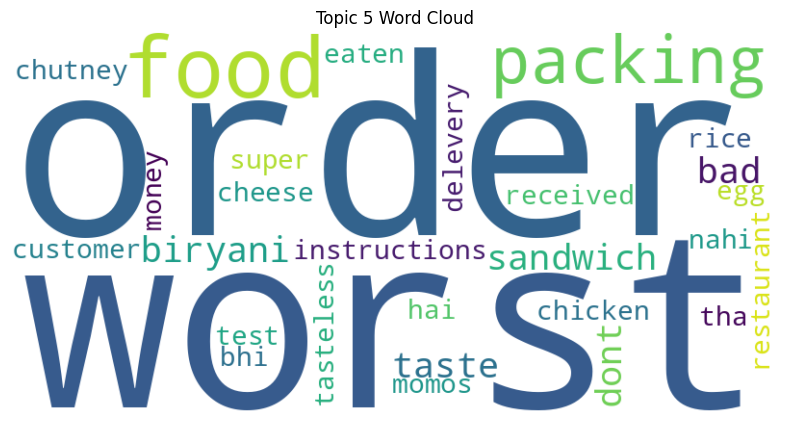

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a given topic
def generate_wordcloud(topic_words, topic_idx):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()

# Display word cloud for each topic
n_top_words = 30
for topic_idx, topic in enumerate(lda_model.components_):
    sorted_indices = topic.argsort()[::-1][:n_top_words]
    topic_words = [feature_names[i] for i in sorted_indices]
    generate_wordcloud(topic_words, topic_idx)
